In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from  keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import layers, models

In [2]:
train_generator = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
    
)

In [3]:
val_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
   
)

In [4]:
_directory(
        "Dataset/Original/train",
        target_size=(256, 256),
        batch_size=32,
        class_mode="sparse",
       
)

Found 2402 images belonging to 3 classes.


In [5]:
val_data = val_generator.flow_from_directory(
    "Dataset/Original/val",
    target_size=(256, 256),
    class_mode="sparse",
    batch_size=32,
)

Found 268 images belonging to 3 classes.


In [6]:
train_data.class_indices

{'blast': 0, 'brown': 1, 'healthy': 2}

In [7]:
class_names = list(train_data.class_indices.keys())
class_names

['blast', 'brown', 'healthy']

In [8]:
train_data[0][0]

array([[[[0.61735266, 0.7546076 , 0.49127373],
         [0.6224209 , 0.7551861 , 0.4817848 ],
         [0.6162783 , 0.7479246 , 0.46278957],
         ...,
         [0.61851186, 0.6118075 , 0.45836115],
         [0.6196487 , 0.6137969 , 0.46290824],
         [0.6207854 , 0.61578625, 0.46745533]],

        [[0.6176369 , 0.7548918 , 0.49212632],
         [0.6215683 , 0.7549019 , 0.4823532 ],
         [0.6176992 , 0.74906135, 0.46477887],
         ...,
         [0.5939215 , 0.59224504, 0.46394113],
         [0.58823764, 0.586277  , 0.45882562],
         [0.5825538 , 0.5803089 , 0.45371017]],

        [[0.6179211 , 0.755176  , 0.4929789 ],
         [0.62071574, 0.7546177 , 0.48292157],
         [0.6191202 , 0.7501981 , 0.46676823],
         ...,
         [0.5256933 , 0.5217717 , 0.4018693 ],
         [0.5217146 , 0.51779306, 0.39817476],
         [0.51773596, 0.5138144 , 0.39448026]],

        ...,

        [[0.35180172, 0.398313  , 0.35184613],
         [0.35094914, 0.39802882, 0.3529829 ]

In [9]:
train_data[0][1]

array([0., 1., 0., 0., 1., 2., 0., 0., 1., 2., 1., 0., 2., 1., 0., 2., 0.,
       0., 0., 0., 1., 0., 0., 2., 0., 0., 0., 1., 0., 2., 2., 1.],
      dtype=float32)

In [10]:
input_shape = ( 256 , 256, 3)
n_classes = 3

model = models.Sequential([
    
    layers.InputLayer(input_shape = input_shape),
    
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
2402/32

75.0625

In [14]:
268/32

8.375

In [26]:
history = model.fit(
    
    train_data,
    
    steps_per_epoch = 76,
    batch_size = 32,
    validation_data = val_data,
    validation_steps = 8,
    
    verbose = 1,
    epochs = 50,
    
)

Epoch 1/50
76/76 [==============================] - 23s 299ms/step - loss: 0.5604 - accuracy: 0.7810 - val_loss: 0.5605 - val_accuracy: 0.7969
Epoch 2/50
76/76 [==============================] - 24s 311ms/step - loss: 0.4796 - accuracy: 0.8077 - val_loss: 0.6441 - val_accuracy: 0.7227
Epoch 3/50
76/76 [==============================] - 24s 317ms/step - loss: 0.4784 - accuracy: 0.8147 - val_loss: 0.6150 - val_accuracy: 0.7500
Epoch 4/50
76/76 [==============================] - 26s 340ms/step - loss: 0.4122 - accuracy: 0.8381 - val_loss: 0.5952 - val_accuracy: 0.7617
Epoch 5/50
76/76 [==============================] - 25s 327ms/step - loss: 0.4309 - accuracy: 0.8351 - val_loss: 0.5388 - val_accuracy: 0.8008
Epoch 6/50
76/76 [==============================] - 24s 317ms/step - loss: 0.3962 - accuracy: 0.8464 - val_loss: 0.5449 - val_accuracy: 0.7930
Epoch 7/50
76/76 [==============================] - 24s 313ms/step - loss: 0.4377 - accuracy: 0.8301 - val_loss: 0.8859 - val_accuracy: 0.6836

In [27]:
history

In [28]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 76}

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [31]:
val_acc

[0.796875,
 0.72265625,
 0.75,
 0.76171875,
 0.80078125,
 0.79296875,
 0.68359375,
 0.79296875,
 0.79296875,
 0.8046875,
 0.8125,
 0.83203125,
 0.8203125,
 0.80859375,
 0.765625,
 0.76953125,
 0.81640625,
 0.8203125,
 0.76953125,
 0.79296875,
 0.80078125,
 0.796875,
 0.7890625,
 0.82421875,
 0.80859375,
 0.83984375,
 0.8125,
 0.8359375,
 0.84765625,
 0.8203125,
 0.8125,
 0.8125,
 0.8203125,
 0.81640625,
 0.82421875,
 0.85546875,
 0.79296875,
 0.796875,
 0.77734375,
 0.81640625,
 0.7890625,
 0.84375,
 0.796875,
 0.8359375,
 0.8359375,
 0.8203125,
 0.8046875,
 0.80859375,
 0.8203125,
 0.765625]

In [32]:
acc

[0.7810158133506775,
 0.8076602816581726,
 0.8147377371788025,
 0.8380516171455383,
 0.8351373672485352,
 0.8463780283927917,
 0.830141544342041,
 0.8263946771621704,
 0.8588675856590271,
 0.8505412340164185,
 0.8709408640861511,
 0.8838468194007874,
 0.8821815252304077,
 0.8971690535545349,
 0.8988342881202698,
 0.8717735409736633,
 0.8713572025299072,
 0.9092422723770142,
 0.916319727897644,
 0.9159033894538879,
 0.9292256236076355,
 0.9242298007011414,
 0.916319727897644,
 0.930474579334259,
 0.9421315789222717,
 0.9437968134880066,
 0.9388009905815125,
 0.9454621076583862,
 0.95212322473526,
 0.9533721804618835,
 0.9063280820846558,
 0.9471274018287659,
 0.9542048573493958,
 0.9571190476417542,
 0.9675270318984985,
 0.961698591709137,
 0.9479600191116333,
 0.9558700919151306,
 0.9700250029563904,
 0.9604496359825134,
 0.8667776584625244,
 0.9388009905815125,
 0.9687760472297668,
 0.950041651725769,
 0.9729391932487488,
 0.9716902375221252,
 0.9796003103256226,
 0.9712739586830139,


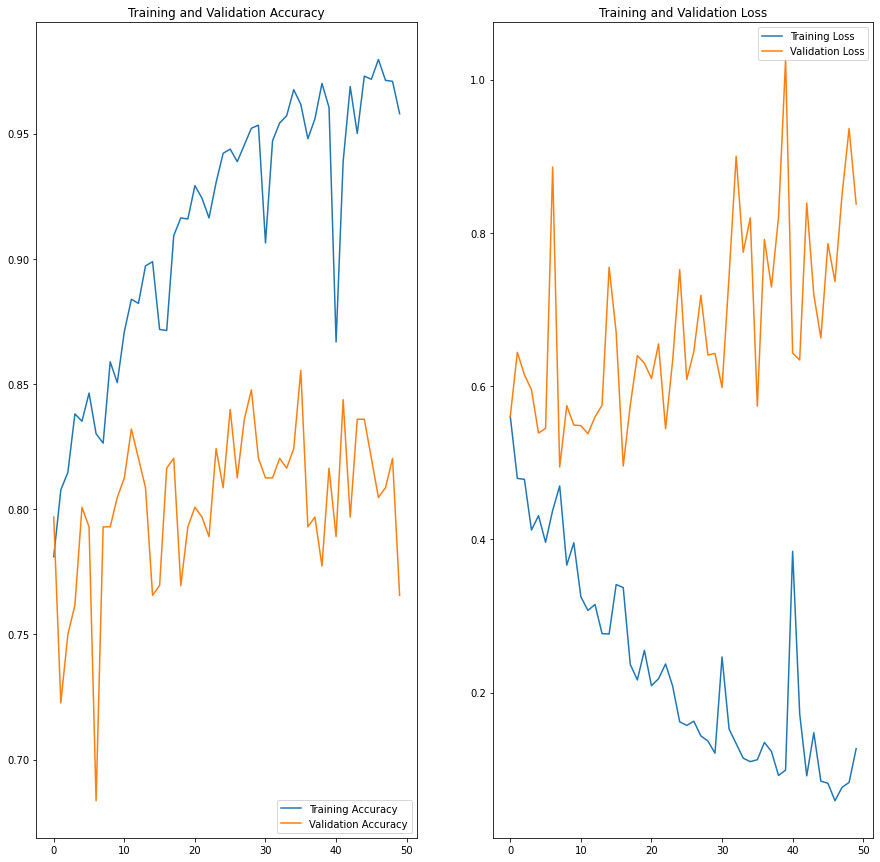

In [33]:
EPOCHS = 50

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [128]:
test_data = tf.keras.utils.image_dataset_from_directory(
    "Dataset/Test_Original",
    
    label_mode= None,
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
)

Found 1145 files belonging to 1 classes.


In [129]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)>

1/1 [==============================] - 0s 31ms/step


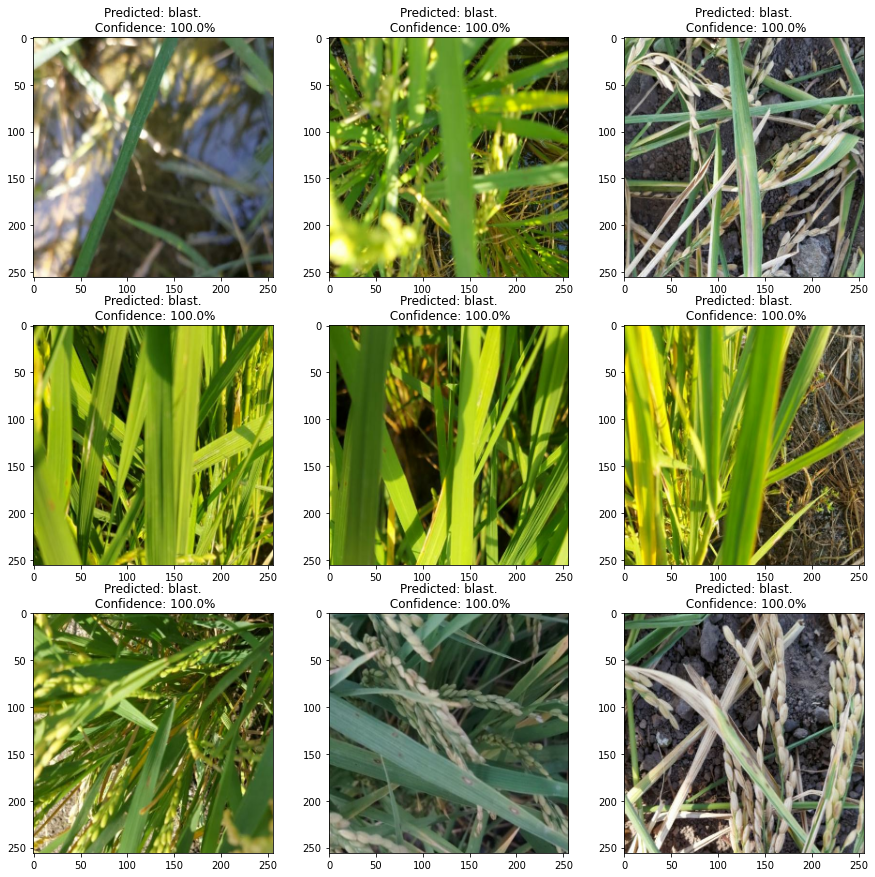

In [160]:
plt.figure(figsize=(15, 15))

for img in test_data:
    for i in range(9):
        ax = plt.subplot(3 , 3, i + 1)
        plt.imshow(img[i].numpy().astype("uint8"))
        img_arr = img.numpy().astype("float")
        
        img_arr = img_arr/255
        prediction = model.predict(img_arr)


        predicted_class = class_names[np.argmax(predictions[0])]
        confidence = round(100 * (np.max(predictions[0])), 2)
        plt.title(f"Predicted: {predicted_class}.\n Confidence: {confidence}%")
    break

In [164]:
model.save("./models/Rice-Disease.h5")